# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 26

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,24.912281,142,118.640650,5.7,4.762336,5.310787,4.859664,2.068627
112,Arrizabalaga,Chelsea,47,3.947368,15,17.563774,3.8,4.449489,6.986341,4.748998,2.052396
560,Kelleher,Liverpool,45,2.000000,10,8.313360,5.0,4.156680,4.331484,4.242413,1.959478
597,Sánchez,Brighton,45,14.878049,61,58.642150,4.1,3.941522,4.886033,4.068062,1.858051
96,Pope,Burnley,56,25.833333,124,113.064407,4.8,4.376687,3.323022,4.609176,1.849488
431,Fabianski,West Ham,50,24.146341,99,98.417037,4.1,4.075857,4.004061,4.037086,1.822779
548,Mendy,Chelsea,51,21.777778,98,86.212583,4.5,3.958741,5.067802,4.258250,1.752960
516,Areola,Fulham,45,26.052632,99,95.086865,3.8,3.649799,2.925690,3.433777,1.720532
245,Adrián,Liverpool,42,2.972973,11,10.438778,3.7,3.511225,5.730734,3.596959,1.713302


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.102302,7.0,5.275575,NaN,5.329921,2.515032
273,Stones,Manchester City,52,15.970149,107,79.668762,6.7,4.988605,3.247425,5.026540,2.187648
277,Cancelo,Manchester City,62,20.961538,109,112.079878,5.2,5.346930,3.439521,5.400295,2.147379
75,Bernardo,Brighton,39,2.941176,5,11.678342,1.7,3.970636,NaN,4.094347,2.010610
123,James,Chelsea,50,21.081081,78,92.511105,3.7,4.388347,4.589835,4.794215,1.962529
556,Dias,Manchester City,61,23.800000,119,112.684528,5.0,4.734644,3.189521,4.772871,1.917001
558,Coufal,West Ham,46,21.842105,83,88.832982,3.8,4.067052,4.508473,4.022583,1.896273
435,Cresswell,West Ham,58,25.744681,121,115.453173,4.7,4.484545,5.627955,4.440116,1.862106
109,Rüdiger,Chelsea,46,12.083333,58,48.192441,4.8,3.988340,4.204225,4.316086,1.859573


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,62,20.952381,132,114.751843,6.3,5.476793,5.739199,5.549338,2.199533
301,Lingard,West Ham,60,5.000000,39,26.683392,7.8,5.336678,NaN,5.313921,2.178690
24,Saka,Arsenal,52,21.904762,92,97.517755,4.2,4.451898,3.646952,4.408662,1.952286
302,Fernandes,Manchester Utd,116,26.849315,196,175.979242,7.3,6.554329,6.942087,5.803334,1.924417
105,Jorginho,Chelsea,47,18.139535,78,75.037712,4.3,4.136694,5.114961,4.460933,1.908115
37,Grealish,Aston Villa,76,21.864407,129,112.394539,5.9,5.140525,3.149135,5.110246,1.864665
570,Raphinha,Leeds United,54,20.888889,94,90.167324,4.5,4.316521,5.688610,4.004037,1.857535
272,De Bruyne,Manchester City,118,20.961538,109,133.404245,5.2,6.364239,3.820642,6.461372,1.852702
390,Son,Tottenham,95,25.820896,173,144.975269,6.7,5.614649,5.108161,5.563573,1.821633


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
506,Wilson,Newcastle Utd,65,21.090909,116,105.051014,5.5,4.980867,3.548859,4.952543,1.953657
202,Bamford,Leeds United,68,25.818182,142,131.048019,5.5,5.075804,3.166286,4.688159,1.946482
665,Maja,Fulham,55,5.945946,22,26.000000,3.7,4.372727,NaN,4.234923,1.864537
388,Kane,Tottenham,111,23.970588,163,148.473527,6.8,6.193988,5.180000,6.111394,1.859126
437,Antonio,West Ham,65,16.956522,78,79.785507,4.6,4.705299,5.473859,4.686402,1.845570
514,Watkins,Aston Villa,66,25.227273,111,114.282512,4.4,4.530118,3.688084,4.473384,1.763346
164,Calvert-Lewin,Everton,78,22.857143,128,109.971014,5.6,4.811232,5.395323,4.641941,1.722697
224,Vardy,Leicester City,102,23.157895,132,127.396522,5.7,5.501213,3.817286,5.027384,1.722497
68,Maupay,Brighton,61,24.117647,82,97.608502,3.4,4.047182,3.200000,4.040599,1.638656


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,116,26.849315,196,175.979242,7.3,6.554329,5.803334,1.924417
272,De Bruyne,Manchester City,118,20.961538,109,133.404245,5.2,6.364239,6.461372,1.852702
388,Kane,Tottenham,111,23.970588,163,148.473527,6.8,6.193988,6.111394,1.859126
254,Salah,Liverpool,126,26.000000,169,153.752428,6.5,5.913555,5.744488,1.665955
390,Son,Tottenham,95,25.820896,173,144.975269,6.7,5.614649,5.563573,1.821633
224,Vardy,Leicester City,102,23.157895,132,127.396522,5.7,5.501213,5.027384,1.722497
271,Gündogan,Manchester City,62,20.952381,132,114.751843,6.3,5.476793,5.549338,2.199533
277,Cancelo,Manchester City,62,20.961538,109,112.079878,5.2,5.346930,5.400295,2.147379
301,Lingard,West Ham,60,5.000000,39,26.683392,7.8,5.336678,5.313921,2.178690


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,62,20.952381,6.3,5.476793,5.739199,5.545656,5.549338,2.199533
301,Lingard,West Ham,60,5.000000,7.8,5.336678,NaN,5.811879,5.313921,2.178690
24,Saka,Arsenal,52,21.904762,4.2,4.451898,3.646952,4.589919,4.408662,1.952286
105,Jorginho,Chelsea,47,18.139535,4.3,4.136694,5.114961,4.309180,4.460933,1.908115
570,Raphinha,Leeds United,54,20.888889,4.5,4.316521,5.688610,3.917318,4.004037,1.857535
284,Foden,Manchester City,61,19.791667,4.8,4.295415,5.258895,4.353830,4.343025,1.739162
33,Hourihane,Aston Villa,59,4.000000,5.0,4.213519,NaN,4.292524,4.205627,1.734679
45,El Ghazi,Aston Villa,53,16.097561,4.1,3.924182,4.091623,3.987293,3.904924,1.704556
449,Soucek,West Ham,53,26.046512,4.3,3.900747,2.982118,4.294460,3.880107,1.694376


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
239,Justin,Leicester City,49,22.954545,101,90.006582,4.4,3.921079,8.796761,3.725176,1.771363
112,Arrizabalaga,Chelsea,47,3.947368,15,17.563774,3.8,4.449489,6.986341,4.748998,2.052396
302,Fernandes,Manchester Utd,116,26.849315,196,175.979242,7.3,6.554329,6.942087,5.803334,1.924417
67,Veltman,Brighton,43,20.000000,62,74.392726,3.1,3.719636,6.358730,3.844564,1.793768
120,Mount,Chelsea,68,26.279070,113,112.986871,4.3,4.299500,5.913556,4.590277,1.648783
271,Gündogan,Manchester City,62,20.952381,132,114.751843,6.3,5.476793,5.739199,5.549338,2.199533
245,Adrián,Liverpool,42,2.972973,11,10.438778,3.7,3.511225,5.730734,3.596959,1.713302
570,Raphinha,Leeds United,54,20.888889,94,90.167324,4.5,4.316521,5.688610,4.004037,1.857535
435,Cresswell,West Ham,58,25.744681,121,115.453173,4.7,4.484545,5.627955,4.440116,1.862106


In [11]:
metric = 'next5_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,20.961538,109,133.404245,5.2,6.364239,6.461372,1.852702
388,Kane,Tottenham,111,23.970588,163,148.473527,6.8,6.193988,6.111394,1.859126
302,Fernandes,Manchester Utd,116,26.849315,196,175.979242,7.3,6.554329,5.803334,1.924417
254,Salah,Liverpool,126,26.000000,169,153.752428,6.5,5.913555,5.744488,1.665955
390,Son,Tottenham,95,25.820896,173,144.975269,6.7,5.614649,5.563573,1.821633
271,Gündogan,Manchester City,62,20.952381,132,114.751843,6.3,5.476793,5.549338,2.199533
277,Cancelo,Manchester City,62,20.961538,109,112.079878,5.2,5.346930,5.400295,2.147379
39,Hause,Aston Villa,44,4.000000,28,21.102302,7.0,5.275575,5.329921,2.515032
276,Sterling,Manchester City,116,24.074074,130,126.139676,5.4,5.239648,5.316841,1.538414


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,102,23.157895,5.7,5.501213,4.710844,1.722497,14.7,2.5,17.2,0.742727
254,Salah,Liverpool,126,26.000000,6.5,5.913555,6.189528,1.665955,13.8,3.6,17.4,0.669231
388,Kane,Tottenham,111,23.970588,6.8,6.193988,6.682160,1.859126,12.8,5.2,18.0,0.750920
202,Bamford,Leeds United,68,25.818182,5.5,5.075804,4.594732,1.946482,12.7,2.7,15.4,0.596479
302,Fernandes,Manchester Utd,116,26.849315,7.3,6.554329,4.917121,1.924417,11.7,9.4,21.1,0.785867
514,Watkins,Aston Villa,66,25.227273,4.4,4.530118,4.450775,1.763346,11.6,2.9,14.5,0.574775
164,Calvert-Lewin,Everton,78,22.857143,5.6,4.811232,4.020427,1.722697,11.0,1.0,12.0,0.525000
249,Firmino,Liverpool,92,26.842105,3.8,4.409901,4.533308,1.453901,10.5,3.8,14.3,0.532745
251,Mané,Liverpool,118,24.042553,4.7,5.296937,5.553485,1.541998,10.5,3.7,14.2,0.590619


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week24,assists_week25,assists_week26,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,...,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week24,xG_week25,xG_week26,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 24,xPoints week 25,xPoints week 26,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards,form 20
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87,57.220000,3.218625,0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,7,100,25.0,25.0,0.000000,6,NaN,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,...,0.6,0.2,0.3,NaN,0.0,1.1,NaN,NaN,NaN,NaN,0.2,1.5,NaN,NaN,NaN,0.2,0.3,0.1,0.2,0.0,NaN,NaN,NaN,2.4,1.0,1.6,1.00000,6.400000,1.800000,3.200000,NaN,2.3,8.700000,NaN,NaN,NaN,NaN,2.800000,13.300000,NaN,NaN,NaN,1.800000,3.500000,2.400000,2.800000,2.3,NaN,4,3.306667
235,105.956634,4.204628,5,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13,348,0.0,NaN,7.314122,7,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0,...,0.1,0.0,0.2,0.5,NaN,0.9,0.6,0.2,0.2,0.1,0.2,0.5,0.6,0.0,0.1,0.1,0.0,0.0,0.8,0.2,0.4,1.0,4.036883,1.8,NaN,1.0,2.22313,3.132871,2.165299,4.606531,5.318731,NaN,11.197209,9.93372,6.047554,4.765299,3.048812,3.149569,8.746978,9.787626,1.0,2.867879,2.701897,2.548812,2.367879,7.367879,2.0,4.024724,0,4.283274


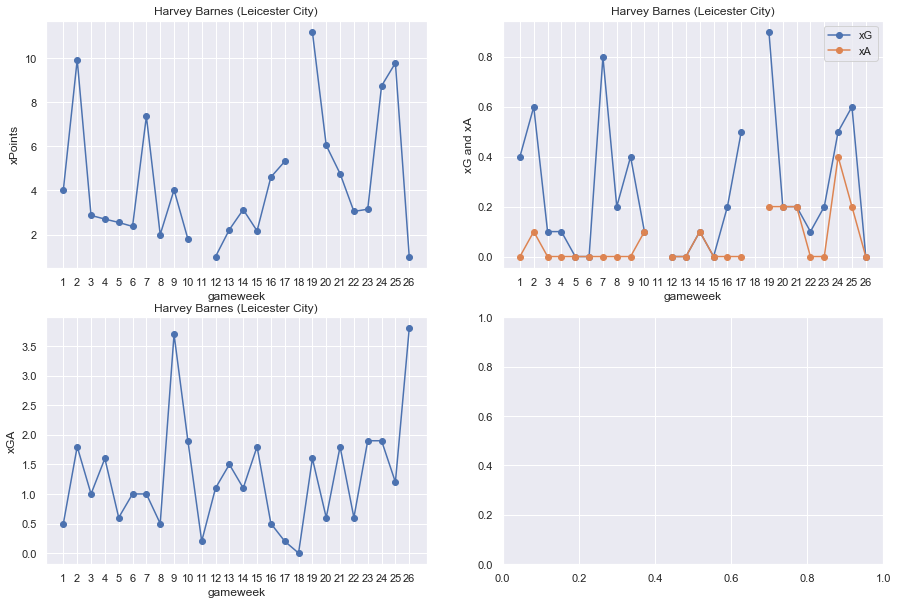

In [14]:
# find player index
name_string = 'Barnes'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
ix = 235

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [15]:
# find player index
df.loc[df['web_name'].str.contains('De '),'web_name']

id
272    De Bruyne
Name: web_name, dtype: object

In [16]:
my_starting11 = [12,109,558,277,271,302,272,37,388,202,224] #vardy=224, grealish=37, mane=251
my_subs = [597,461,23,74]

In [17]:
exp_avg = df.loc[my_starting11,'adjusted points per game'].sum() + df.loc[my_starting11,'adjusted points per game'].max()
exp_next = df.loc[my_starting11,'next1_xP'].sum() + df.loc[my_starting11,'next1_xP'].max()

print('STARTING 11')
print('Expected points on average: ' + str(exp_avg))
print('Expected points next gameweek: ' + str(exp_next))
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11
Expected points on average: 65.02587768098718
Expected points next gameweek: 63.9542627827165


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,53,24.912281,5.7,4.762336,5.310787,4.659658,5.258621,4.859664,2.068627
109,Rüdiger,Chelsea,46,12.083333,4.8,3.988340,4.204225,4.279281,4.231839,4.316086,1.859573
558,Coufal,West Ham,46,21.842105,3.8,4.067052,4.508473,4.327102,4.176353,4.022583,1.896273
277,Cancelo,Manchester City,62,20.961538,5.2,5.346930,3.439521,4.505825,5.523149,5.400295,2.147379
271,Gündogan,Manchester City,62,20.952381,6.3,5.476793,5.739199,5.797513,5.545656,5.549338,2.199533
302,Fernandes,Manchester Utd,116,26.849315,7.3,6.554329,6.942087,6.115805,4.917121,5.803334,1.924417
272,De Bruyne,Manchester City,118,20.961538,5.2,6.364239,3.820642,5.499525,6.443406,6.461372,1.852702
37,Grealish,Aston Villa,76,21.864407,5.9,5.140525,3.149135,4.392073,5.188221,5.110246,1.864665
388,Kane,Tottenham,111,23.970588,6.8,6.193988,5.180000,5.907524,6.682160,6.111394,1.859126



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
597,Sánchez,Brighton,45,14.878049,4.1,3.941522,4.886033,4.552225,3.926721,4.068062,1.858051
461,Saïss,Wolves,49,17.804878,4.1,3.706320,2.165553,2.385564,3.348420,3.540886,1.674345
23,Smith Rowe,Arsenal,43,11.944444,3.6,3.420211,2.653070,3.432291,3.549820,3.406242,1.649372
74,White,Brighton,44,24.827586,2.9,3.222831,4.206033,4.282225,3.208349,3.348827,1.536424


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)